# Modelling waning immunity

In the last 2 etivities, you gained a better understanding of how susceptibility in a population can change independently of the epidemic - first through population turnover, then through vaccination. So far we have only modelled immunising infections where recovered or vaccinated individuals are permamently immune to (re)infection. However, many infections only provide temporary immunity after recovery - immunity can wane over time, returning those previously infected (or vaccinated) individuals to the susceptible pool. This is the scenario you will explore in this etivity. 

Go back to your simple SIR model from week 3, assuming no births or deaths and a totally susceptible population with the exception of 1 infected individual. The infection and recovery rates are 0.4 and 0.2 days$^{-1}$ respectively, and the average duration of immunity is 10 years.

### Question: What is the value of the waning rate $\sigma$? Draw a diagram for this model structure on paper. 

$S$ ---$\lambda$---> $I$ ---$\gamma$---> $R$

 |-----<------$\sigma$-----<------|

- $\sigma$ would be 0.1 years$^{-1}$

Code this model below, making sure to make an appropriate choice for the duration to run the model for and the intervals to solve the equations at. Generate a plot to study the infection dynamics.

In [1]:
# Modelling the epidemic

# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
library(ggplot2)

# MODEL INPUTS:

initial_state_values <- c(S = 1e6 - 1,
                          I = 1,
                          R = 0)
parameters <- c(beta = 0.4*365, gamma = 0.2*365, sigma = 0.1)

# TIMESTEPS:

times <- seq(from = 0, to = 75, by = 2/365)

sir_model <- function(time, state, parameters) {  
    
    with(as.list(c(state, parameters)), {     
      
        N <- S+I+R
        lambda <- beta * I/N
        dS <- -lambda * S + sigma * R
        dI <- lambda * S - gamma * I
        dR <- gamma * I - sigma * R
    
        return(list(c(dS, dI, dR))) 
    })
  
}

# MODEL OUTPUT (solving the differential equations):

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

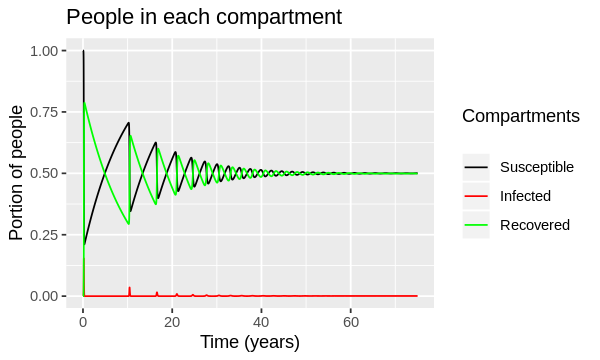

In [2]:
# Plotting the proportion of people in each compartment over time

output_long <- melt(as.data.frame(output), id = "time")                  

options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(data = output_long,          # specify object containing data to plot
       aes(x = time, y = value / 1e6, group = variable, colour = variable)) +   # assign columns to axes and groups
  geom_line() +                     # represent data as lines
  labs(title = "People in each compartment", x = "Time (years)", y = "Portion of people", color = "Compartments\n") +
  scale_color_manual(labels = c("Susceptible", "Infected", "Recovered"), values = c("black", "red", "green"))

### Question: What do you observe about the infection dynamics? How does this compare to the model with population turnover from the first notebook this week? 

- It has same patterns as long term epidemics with turnover. As the rate of waning is still quicker than human population turnover, therefore the time between epidemics is shorter.

Also try to think of this in the context of informing disease control measures, which is usually the aim of using mathematical models for infectious diseases. Imagine the immunity you see building up in the population after the first outbreak here is actually due to vaccination (you should see that after about 3 months, 78% of the population are immune).

### Question: In this case, what implications would this have for a vaccination programme against this disease?

- Because of waning immunity, effects of vaccination will be waning over time too. So, boosters or making a better vaccines is necessary.

Now, copy-paste your code below to model a scenario where the immunity provided by infection is much more short-lived, only lasting 6 months on average.

### Question: What do you observe about the infection dynamics? How does this compare to the model with slow waning of immunity, and with population turnover?

- It is similar to fast turnover population where infectious quickly reaches to an endemic equilibrium.

In [3]:
parameters <- c(beta = 0.4*365, gamma = 0.2*365, sigma = 2)

times2 <- seq(from = 0, to = 5, by = 2/365)

output2 <- as.data.frame(ode(y = initial_state_values, 
                            times = times2, 
                            func = sir_model,
                            parms = parameters))

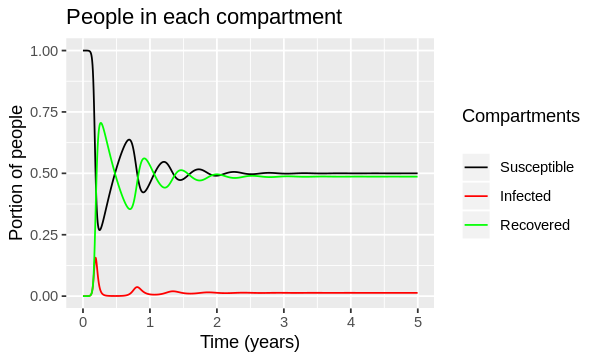

In [4]:
# Plotting the proportion of people in each compartment over time

output_long <- melt(as.data.frame(output2), id = "time")                  

options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(data = output_long,          # specify object containing data to plot
       aes(x = time, y = value / 1e6, group = variable, colour = variable)) +   # assign columns to axes and groups
  geom_line() +                     # represent data as lines
  labs(title = "People in each compartment", x = "Time (years)", y = "Portion of people", color = "Compartments\n") +
  scale_color_manual(labels = c("Susceptible", "Infected", "Recovered"), values = c("black", "red", "green"))

Lastly, in the previous example, change the initial conditions to represent an endemic infection rather than introduction of a single infected case into the population. Assume an endemic prevalence of 10% and that 60% of the population are already immune at the first timestep. Adapt this in the code above.

### Question: What do you observe about the infection dynamics if you change the initial state values?

- Unlike the previous models, this time changing initial state values does not determine endemic or pandemic equilibriums. It completely depends on parameters.

In [6]:
initial_state_values2 <- c(S = 3e5,
                          I = 2e5,
                          R = 5e5)

output3 <- as.data.frame(ode(y = initial_state_values2, 
                            times = times2, 
                            func = sir_model,
                            parms = parameters))

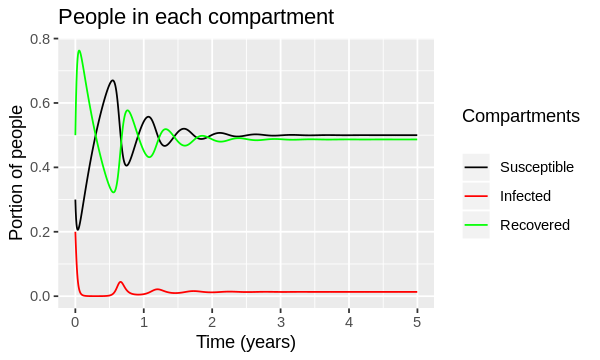

In [7]:
# Plotting the proportion of people in each compartment over time

output_long <- melt(as.data.frame(output3), id = "time")                  

options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(data = output_long,          # specify object containing data to plot
       aes(x = time, y = value / 1e6, group = variable, colour = variable)) +   # assign columns to axes and groups
  geom_line() +                     # represent data as lines
  labs(title = "People in each compartment", x = "Time (years)", y = "Portion of people", color = "Compartments\n") +
  scale_color_manual(labels = c("Susceptible", "Infected", "Recovered"), values = c("black", "red", "green"))